In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

In [4]:
np.transpose([tx[0]]).shape

(2, 1)

In [5]:
y,tx

(array([109.81967768,  73.68895452,  96.58434842, ...,  58.32779473,
         74.38901745,  51.59669261]),
 array([[ 1.        ,  1.94406149],
        [ 1.        ,  0.62753668],
        [ 1.        ,  2.01244346],
        ...,
        [ 1.        , -0.64968792],
        [ 1.        ,  0.69312469],
        [ 1.        , -1.14970831]]))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [10]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    return np.sum(np.square(y-tx@w))/(y.shape[0]*2)

In [11]:
abs(y-tx@[1,2])

array([104.9315547 ,  71.43388117,  91.55946151, ...,  58.62717056,
        72.00276808,  52.89610924])

In [12]:
compute_loss(y,tx,[-100.0, -83.33333333])

19717.160504451604

# 2 Grid Search

Fill in the function `grid_search()` below:

In [9]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i in range (len(w0)):
        for j in range (len(w1)):
            loss_n = compute_loss(y, tx, [w0[i], w1[j]])
            losses[i][j] = loss_n
        
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.049 seconds


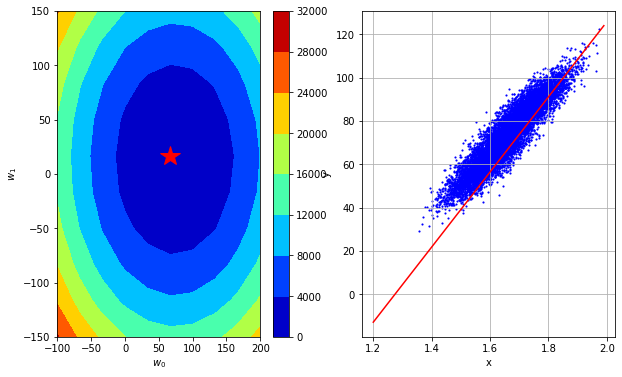

In [10]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [11]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    e = y - tx @ w
    return -1/y.shape[0] * (tx.T @ e)

In [12]:
109.81967768 - (1+2*1.94406149) + 73.68895452 - (1+2*0.62753668) + 96.58434842 - (1+2*2.01244346)

267.92489735999993

In [13]:
267.92489735999993/3

89.30829911999997

In [14]:
compute_gradient(np.array([109.81967768, 73.68895452, 96.58434842]),np.array([[1., 1.94406149],[1.,0.62753668 ],[1., 2.01244346]]),[1,2])

array([ -89.30829912, -144.35967157])

In [15]:
compute_gradient(y, tx, [100,20])

array([26.706078  ,  6.52028757])

In [16]:
compute_gradient(y, tx, [50,10]) #kolku se pomali tolku sme poblisku?

array([-23.293922  ,  -3.47971243])

Please fill in the functions `gradient_descent` below:

In [17]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        gradient = compute_gradient(y,tx,w)
        loss = compute_loss(y,tx,w)
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [18]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
#0.001, 0.01,  0.5,  1,  2,  2.5
# Initialization
w_initial = np.array([0,0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, 0.7)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591674, w0=51.30574540147363, w1=9.435798704492282
Gradient Descent(1/49): loss=265.3024621089601, w0=66.69746902191572, w1=12.266538315840002
Gradient Descent(2/49): loss=37.87837955044118, w0=71.31498610804834, w1=13.11576019924433
Gradient Descent(3/49): loss=17.41021212017447, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/49): loss=15.568077051450455, w0=73.11581777164007, w1=13.446956733772023
Gradient Descent(5/49): loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/49): loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
Gradient Descent(7/49): loss=15.386020684743531, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638307, w0=73.29348920882515, w1=13.47963283863509
Gradient Descent(10/49): loss=15.385887965652202, w0=73.29379216412117, w1=13.

In [19]:
#loss se namaluva
#algoritmot konvergira posle 30ta iteracija isto e
#w=[0,0]
# so step 0.001 ne e okej, pogolem loss , ne konvergira
# so gamma=0.01 isto ^
# so gamma=0.5 rechisi isto ko 0.7
# so gamma=1 odma najde reshenie
# so gamma=2 izbega od optimumot, premn golem step
# so gamma=2.5 duri polosho od step 2
#w=[100,10] gamma=0.1 konvergra sosema okej
#w=[-1000,1000] gamma =0.1 konvergira

In [20]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [21]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for y_n,tx_n in batch_iter(y, tx, batch_size):
            gradient = compute_stoch_gradient(y_n, tx_n, w)
            loss = compute_loss(y_n, tx_n, w)
            w = w - gamma * gradient
            # store w and loss
            ws.append(w)
            losses.append(loss)
            print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                  bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    
        
    return losses, ws

In [22]:
for x_x,y_y in batch_iter(y, tx,1):
    print(x_x,y_y)

[83.53908245] [[1.         0.55127761]]


In [23]:
109.81967768 - (1+2*1.94406149) 

104.93155469999999

In [24]:
w_proba = np.array([1,2])
w_proba.shape

(2,)

In [25]:
e = [109.81967768] - np.array([[1.     ,    1.40205792]]) @ np.array([1,2])
(e**2)/2

array([5619.64967613])

In [26]:
compute_loss(np.array( [109.81967768] ),np.array([[1.     ,    1.40205792]]),np.array([1,2]))

5619.649676125432

In [27]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=2014.8574770097387, w0=44.436025108795945, w1=-25.355110719396603
Stochastic Gradient Descent(1/49): loss=121.6608216354937, w0=33.51688571034591, w1=-11.12473065528148
Stochastic Gradient Descent(2/49): loss=321.7793465438038, w0=51.27480674893958, w1=-19.711762556224876
Stochastic Gradient Descent(3/49): loss=3517.098336508284, w0=109.98388926415282, w1=83.36539255787167
Stochastic Gradient Descent(4/49): loss=9959.260506774772, w0=11.19079589908364, w1=-57.616975107354165
Stochastic Gradient Descent(5/49): loss=1170.9359026674424, w0=45.06581891921004, w1=-61.66699890839315
Stochastic Gradient Descent(6/49): loss=928.5787910089377, w0=75.23214476755886, w1=-55.5226718309546
Stochastic Gradient Descent(7/49): loss=1668.1590539876604, w0=115.66475379675592, w1=-20.689465324535533
Stochastic Gradient Descent(8/49): loss=47.51894441765877, w0=122.48887026186007, w1=-10.587753873932089
Stochastic Gradient Descent(9/49): loss=2758.3343460719693, w0=

In [28]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


Load Data

In [29]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

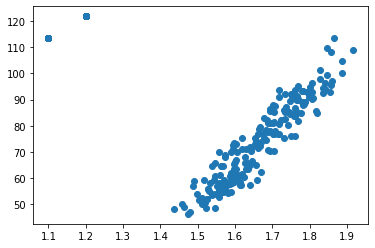

In [30]:
#plot
plt.scatter(height, weight)
plt.show()

In [31]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=6433.877040113333, w0=79.40528634361233, w1=-90.35066262795867
Stochastic Gradient Descent(1/49): loss=3678.4202387071127, w0=139.44570467937154, w1=-27.70508631993259
Stochastic Gradient Descent(2/49): loss=1655.0569689567158, w0=99.17219192498692, w1=18.11980432989391
Stochastic Gradient Descent(3/49): loss=667.6802337370319, w0=124.75200093643755, w1=-1.5150411083458906
Stochastic Gradient Descent(4/49): loss=1416.3885932171283, w0=87.49531265966253, w1=-33.78622989038451
Stochastic Gradient Descent(5/49): loss=327.6561897742787, w0=105.41466158697551, w1=-15.474791272186813
Stochastic Gradient Descent(6/49): loss=12.385460473581158, w0=108.89858914995807, w1=-10.90241809243922
Stochastic Gradient Descent(7/49): loss=30.950304604698047, w0=103.39120333519949, w1=-4.635883701290502
Stochastic Gradient Descent(8/49): loss=11.37653228496365, w0=106.7302154105392, w1=-8.435151576532746
Stochastic Gradient Descent(9/49): loss=4.181719323407729, w0=

In [32]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [6]:
def compute_loss_MAE(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    return np.sum(abs(y-tx@w))/(y.shape[0])

Subgradient descent for the MAE

In [7]:
compute_loss_MAE(y, tx,[0,0])

73.29392200210518

In [ ]:
def compute_subgradient(y, tx, w):
    """Compute the gradient."""
    
    e = y - tx @ w
    grad = -tx.T.dot(np.sign(e))/len(e)
    
    if np.sum(np.sign(e)==0)>0:
        print("Non differentiable point")
    return grad